In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from tqdm import tqdm
import pickle
import joblib

In [3]:
def read_data(file_path):
    return pd.read_csv(file_path, encoding = 'cp949',delimiter = '\t')

In [4]:
def get_train_data(data_frame):
    return data_frame.iloc[:, 1:].to_numpy()

In [5]:
def scaling_data(numpy_dataset,scaler):
    #scaling
    return scaler.fit_transform(numpy_dataset)
     

In [6]:
def get_LOF_model(n_neighbors = 1000,novelty=True):
    return LocalOutlierFactor(n_neighbors=1000,novelty=novelty)

In [7]:
def predict_score(lof_model,dataset,scaler):
    scaled_set = scaling_data(dataset.reshape(-1,1),scaler)
    return lof_model.decision_function(scaled_set)

In [8]:
def get_error_data(num_abnormals = 10,margin_min = 0.90 ,margin_max = 1):
    rng = np.random.RandomState(42)
    
    # 고장 데이터 생성
    X_outliers_top = np.stack((rng.uniform(low=0, high=1, size=(num_abnormals)), rng.uniform(low=margin_min, high=margin_max, size=(num_abnormals))), axis=1)
    X_outliers_bottom = np.stack((rng.uniform(low=0, high=1, size=(num_abnormals)), rng.uniform(low=1-margin_max, high=1-margin_min, size=(num_abnormals))), axis=1)

    X_outliers_left = np.stack((rng.uniform(low=1-margin_max, high=1-margin_min, size=(num_abnormals)), rng.uniform(low=0, high=margin_max, size=(num_abnormals))), axis=1)
    X_outliers_right = np.stack((rng.uniform(low=margin_min, high=margin_max, size=(num_abnormals)), rng.uniform(low=0, high=1, size=(num_abnormals))), axis=1)

    X_outliers = np.concatenate((X_outliers_top,X_outliers_bottom,X_outliers_left,X_outliers_right))

    X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])
    return X_outliers

In [9]:
def train_model(lof_model,filepath,data_scaler,batch_size = 10000):        
    print("reading data")
    data_frame = read_data(filepath)
    print("getting train data")
    train_dataset = get_train_data(data_frame)
    print("scaling data")
    train_dataset = scaling_data(train_dataset, data_scaler) #
    print("training start")
    before = 0
    for i in range(batch_size,len(train_dataset),batch_size):
        lof_model.fit(train_dataset[before:i])
        print(i / len(train_dataset))
        before = i

In [10]:
#'LOF_Model_20220404_pump_v1.pkl'
def save_model(clf,filepath):
    # 확장자명 .pkl
    joblib.dump(clf, filepath) 

In [11]:
def load_model(filepath):
    return joblib.load(filepath) 

In [12]:
clf = get_LOF_model(1000)

In [13]:
scaler = preprocessing.StandardScaler()

In [14]:
train_model(clf,'03_10/VIB_0310_motor_51200.csv',scaler)

reading data
getting train data
scaling data
training start
6.604334517204324e-05
0.00013208669034408648
0.00019813003551612973
0.00026417338068817297
0.0003302167258602162
0.00039626007103225945
0.0004623034162043027
0.0005283467613763459
0.0005943901065483892
0.0006604334517204324
0.0007264767968924757
0.0007925201420645189
0.0008585634872365622
0.0009246068324086054
0.0009906501775806486
0.0010566935227526919
0.0011227368679247352
0.0011887802130967785
0.0012548235582688215
0.0013208669034408648
0.0013869102486129081
0.0014529535937849514
0.0015189969389569947
0.0015850402841290378
0.001651083629301081
0.0017171269744731244
0.0017831703196451677
0.0018492136648172108
0.001915257009989254
0.001981300355161297
0.0020473437003333404
0.0021133870455053837
0.002179430390677427
0.0022454737358494703
0.0023115170810215136
0.002377560426193557
0.0024436037713656002
0.002509647116537643
0.0025756904617096864
0.0026417338068817297
0.002707777152053773
0.0027738204972258163
0.00283986384239785

0.025756904617096864
0.02582294796226891
0.02588899130744095
0.025955034652612997
0.02602107799778504
0.02608712134295708
0.026153164688129126
0.026219208033301168
0.02628525137847321
0.026351294723645256
0.026417338068817298
0.02648338141398934
0.026549424759161385
0.026615468104333427
0.02668151144950547
0.026747554794677515
0.026813598139849557
0.026879641485021602
0.026945684830193644
0.027011728175365686
0.02707777152053773
0.027143814865709773
0.027209858210881815
0.02727590155605386
0.027341944901225903
0.027407988246397945
0.02747403159156999
0.027540074936742032
0.027606118281914078
0.02767216162708612
0.027738204972258162
0.027804248317430207
0.02787029166260225
0.02793633500777429
0.028002378352946337
0.02806842169811838
0.02813446504329042
0.028200508388462466
0.028266551733634508
0.02833259507880655
0.028398638423978596
0.028464681769150638
0.028530725114322683
0.028596768459494725
0.028662811804666767
0.028728855149838813
0.028794898495010855
0.028860941840182897
0.028926

0.052438416066602336
0.05250445941177438
0.05257050275694642
0.052636546102118466
0.05270258944729051
0.05276863279246255
0.052834676137634595
0.05290071948280664
0.05296676282797868
0.053032806173150725
0.05309884951832277
0.05316489286349481
0.053230936208666854
0.0532969795538389
0.05336302289901094
0.053429066244182984
0.05349510958935503
0.053561152934527075
0.05362719627969911
0.05369323962487116
0.053759282970043204
0.05382532631521524
0.05389136966038729
0.05395741300555933
0.05402345635073137
0.05408949969590342
0.05415554304107546
0.0542215863862475
0.05428762973141955
0.05435367307659159
0.05441971642176363
0.054485759766935676
0.05455180311210772
0.05461784645727976
0.054683889802451806
0.05474993314762385
0.05481597649279589
0.054882019837967935
0.05494806318313998
0.05501410652831202
0.055080149873484065
0.05514619321865611
0.055212236563828156
0.055278279909000194
0.05534432325417224
0.055410366599344285
0.055476409944516324
0.05554245328968837
0.055608496634860415
0.055

0.07951618758714006
0.0795822309323121
0.07964827427748415
0.0797143176226562
0.07978036096782824
0.07984640431300029
0.07991244765817232
0.07997849100334437
0.08004453434851641
0.08011057769368846
0.0801766210388605
0.08024266438403255
0.08030870772920458
0.08037475107437662
0.08044079441954867
0.08050683776472072
0.08057288110989276
0.0806389244550648
0.08070496780023685
0.08077101114540888
0.08083705449058093
0.08090309783575297
0.08096914118092502
0.08103518452609706
0.08110122787126911
0.08116727121644114
0.08123331456161319
0.08129935790678523
0.08136540125195728
0.08143144459712932
0.08149748794230137
0.0815635312874734
0.08162957463264545
0.08169561797781749
0.08176166132298954
0.08182770466816158
0.08189374801333363
0.08195979135850566
0.0820258347036777
0.08209187804884975
0.0821579213940218
0.08222396473919384
0.08229000808436589
0.08235605142953793
0.08242209477470996
0.08248813811988201
0.08255418146505406
0.0826202248102261
0.08268626815539815
0.08275231150057019
0.082818

0.10679208914319392
0.10685813248836597
0.10692417583353801
0.10699021917871006
0.1070562625238821
0.10712230586905415
0.10718834921422618
0.10725439255939823
0.10732043590457027
0.10738647924974232
0.10745252259491436
0.10751856594008641
0.10758460928525844
0.10765065263043049
0.10771669597560253
0.10778273932077458
0.10784878266594662
0.10791482601111867
0.1079808693562907
0.10804691270146274
0.10811295604663479
0.10817899939180683
0.10824504273697888
0.10831108608215093
0.10837712942732296
0.108443172772495
0.10850921611766705
0.1085752594628391
0.10864130280801114
0.10870734615318318
0.10877338949835523
0.10883943284352726
0.10890547618869931
0.10897151953387135
0.1090375628790434
0.10910360622421544
0.10916964956938749
0.10923569291455952
0.10930173625973157
0.10936777960490361
0.10943382295007566
0.1094998662952477
0.10956590964041975
0.10963195298559178
0.10969799633076383
0.10976403967593587
0.10983008302110792
0.10989612636627996
0.109962169711452
0.11002821305662404
0.1100942

0.13413403404441984
0.13420007738959186
0.1342661207347639
0.13433216407993595
0.134398207425108
0.13446425077028004
0.1345302941154521
0.13459633746062413
0.13466238080579618
0.13472842415096822
0.13479446749614027
0.13486051084131231
0.13492655418648436
0.1349925975316564
0.13505864087682842
0.13512468422200047
0.13519072756717251
0.13525677091234456
0.1353228142575166
0.13538885760268865
0.1354549009478607
0.13552094429303274
0.1355869876382048
0.13565303098337683
0.13571907432854888
0.13578511767372092
0.13585116101889294
0.135917204364065
0.13598324770923703
0.13604929105440908
0.13611533439958112
0.13618137774475317
0.1362474210899252
0.13631346443509726
0.1363795077802693
0.13644555112544135
0.1365115944706134
0.13657763781578544
0.1366436811609575
0.1367097245061295
0.13677576785130155
0.1368418111964736
0.13690785454164564
0.13697389788681769
0.13703994123198973
0.13710598457716178
0.13717202792233382
0.13723807126750587
0.1373041146126779
0.13737015795784996
0.137436201303022

0.16167410898116186
0.1617401523263339
0.16180619567150595
0.161872239016678
0.16193828236185004
0.16200432570702208
0.16207036905219413
0.16213641239736618
0.16220245574253822
0.16226849908771024
0.16233454243288228
0.16240058577805433
0.16246662912322637
0.16253267246839842
0.16259871581357047
0.1626647591587425
0.16273080250391456
0.1627968458490866
0.16286288919425865
0.1629289325394307
0.16299497588460274
0.16306101922977478
0.1631270625749468
0.16319310592011885
0.1632591492652909
0.16332519261046294
0.16339123595563498
0.16345727930080703
0.16352332264597907
0.16358936599115112
0.16365540933632317
0.1637214526814952
0.16378749602666726
0.1638535393718393
0.16391958271701132
0.16398562606218337
0.1640516694073554
0.16411771275252746
0.1641837560976995
0.16424979944287155
0.1643158427880436
0.16438188613321564
0.16444792947838768
0.16451397282355973
0.16458001616873177
0.16464605951390382
0.16471210285907587
0.16477814620424788
0.16484418954941993
0.16491023289459197
0.16497627623

0.18914814057273185
0.1892141839179039
0.18928022726307595
0.189346270608248
0.18941231395342004
0.18947835729859208
0.1895444006437641
0.18961044398893614
0.1896764873341082
0.18974253067928024
0.18980857402445228
0.18987461736962433
0.18994066071479637
0.19000670405996842
0.19007274740514046
0.1901387907503125
0.19020483409548455
0.1902708774406566
0.19033692078582862
0.19040296413100066
0.1904690074761727
0.19053505082134475
0.1906010941665168
0.19066713751168884
0.1907331808568609
0.19079922420203294
0.19086526754720498
0.19093131089237703
0.19099735423754907
0.19106339758272112
0.19112944092789316
0.19119548427306518
0.19126152761823723
0.19132757096340927
0.19139361430858132
0.19145965765375336
0.1915257009989254
0.19159174434409745
0.1916577876892695
0.19172383103444154
0.1917898743796136
0.19185591772478564
0.19192196106995768
0.1919880044151297
0.19205404776030174
0.1921200911054738
0.19218613445064583
0.19225217779581788
0.19231822114098993
0.19238426448616197
0.1924503078313

0.2166882155094739
0.21675425885464591
0.21682030219981796
0.21688634554499
0.21695238889016205
0.2170184322353341
0.21708447558050614
0.2171505189256782
0.21721656227085023
0.21728260561602228
0.21734864896119432
0.21741469230636637
0.21748073565153841
0.21754677899671046
0.21761282234188248
0.21767886568705452
0.21774490903222657
0.21781095237739861
0.21787699572257066
0.2179430390677427
0.21800908241291475
0.2180751257580868
0.21814116910325884
0.2182072124484309
0.21827325579360293
0.21833929913877498
0.218405342483947
0.21847138582911904
0.2185374291742911
0.21860347251946313
0.21866951586463518
0.21873555920980722
0.21880160255497927
0.21886764590015131
0.21893368924532336
0.2189997325904954
0.21906577593566745
0.2191318192808395
0.21919786262601154
0.21926390597118356
0.2193299493163556
0.21939599266152765
0.2194620360066997
0.21952807935187174
0.2195941226970438
0.21966016604221583
0.21972620938738788
0.21979225273255992
0.21985829607773197
0.219924339422904
0.21999038276807606

0.2442282904462159
0.24429433379138796
0.24436037713656
0.24442642048173205
0.2444924638269041
0.24455850717207614
0.24462455051724818
0.24469059386242023
0.24475663720759228
0.2448226805527643
0.24488872389793634
0.24495476724310838
0.24502081058828043
0.24508685393345248
0.24515289727862452
0.24521894062379657
0.2452849839689686
0.24535102731414066
0.2454170706593127
0.24548311400448475
0.2455491573496568
0.24561520069482884
0.24568124404000086
0.2457472873851729
0.24581333073034495
0.245879374075517
0.24594541742068904
0.24601146076586108
0.24607750411103313
0.24614354745620518
0.24620959080137722
0.24627563414654927
0.2463416774917213
0.24640772083689336
0.24647376418206537
0.24653980752723742
0.24660585087240947
0.2466718942175815
0.24673793756275356
0.2468039809079256
0.24687002425309765
0.2469360675982697
0.24700211094344174
0.24706815428861378
0.24713419763378583
0.24720024097895787
0.24726628432412992
0.24733232766930194
0.24739837101447398
0.24746441435964603
0.24753045770481

0.27209858210881815
0.2721646254539902
0.27223066879916225
0.2722967121443343
0.27236275548950634
0.2724287988346784
0.2724948421798504
0.27256088552502244
0.2726269288701945
0.27269297221536654
0.2727590155605386
0.2728250589057106
0.2728911022508827
0.2729571455960547
0.2730231889412268
0.2730892322863988
0.2731552756315709
0.2732213189767429
0.273287362321915
0.273353405667087
0.273419449012259
0.2734854923574311
0.2735515357026031
0.2736175790477752
0.2736836223929472
0.27374966573811926
0.2738157090832913
0.27388175242846335
0.27394779577363537
0.27401383911880745
0.27407988246397946
0.2741459258091515
0.27421196915432355
0.27427801249949557
0.27434405584466764
0.27441009918983966
0.27447614253501174
0.27454218588018375
0.2746082292253558
0.27467427257052784
0.2747403159156999
0.27480635926087194
0.274872402606044
0.274938445951216
0.27500448929638804
0.2750705326415601
0.27513657598673213
0.2752026193319042
0.2752686626770762
0.2753347060222483
0.2754007493674203
0.27546679271259

0.30003491711659247
0.3001009604617645
0.30016700380693656
0.3002330471521086
0.30029909049728065
0.30036513384245267
0.30043117718762474
0.30049722053279676
0.3005632638779688
0.30062930722314085
0.30069535056831287
0.30076139391348494
0.30082743725865696
0.30089348060382903
0.30095952394900105
0.3010255672941731
0.30109161063934514
0.3011576539845172
0.30122369732968923
0.3012897406748613
0.3013557840200333
0.30142182736520534
0.3014878707103774
0.30155391405554943
0.3016199574007215
0.3016860007458935
0.3017520440910656
0.3018180874362376
0.3018841307814097
0.3019501741265817
0.3020162174717538
0.3020822608169258
0.30214830416209787
0.3022143475072699
0.3022803908524419
0.302346434197614
0.302412477542786
0.30247852088795807
0.3025445642331301
0.30261060757830216
0.3026766509234742
0.30274269426864625
0.30280873761381827
0.30287478095899034
0.30294082430416236
0.30300686764933443
0.30307291099450645
0.30313895433967847
0.30320499768485054
0.30327104103002256
0.30333708437519463
0.30

0.32797125212436673
0.3280372954695388
0.3281033388147108
0.3281693821598829
0.3282354255050549
0.328301468850227
0.328367512195399
0.3284335555405711
0.3284995988857431
0.32856564223091517
0.3286316855760872
0.3286977289212592
0.3287637722664313
0.3288298156116033
0.32889585895677537
0.3289619023019474
0.32902794564711946
0.3290939889922915
0.32916003233746355
0.32922607568263557
0.32929211902780764
0.32935816237297966
0.32942420571815173
0.32949024906332375
0.32955629240849577
0.32962233575366784
0.32968837909883986
0.32975442244401193
0.32982046578918395
0.329886509134356
0.32995255247952804
0.3300185958247001
0.33008463916987213
0.3301506825150442
0.3302167258602162
0.33028276920538824
0.3303488125505603
0.33041485589573233
0.3304808992409044
0.3305469425860764
0.3306129859312485
0.3306790292764205
0.3307450726215926
0.3308111159667646
0.3308771593119367
0.3309432026571087
0.33100924600228077
0.3310752893474528
0.3311413326926248
0.3312073760377969
0.3312734193829689
0.331339462728

0.35590758713214105
0.35597363047731306
0.35603967382248514
0.35610571716765715
0.3561717605128292
0.35623780385800125
0.3563038472031733
0.35636989054834534
0.3564359338935174
0.3565019772386894
0.3565680205838615
0.3566340639290335
0.35670010727420554
0.3567661506193776
0.3568321939645496
0.3568982373097217
0.3569642806548937
0.3570303240000658
0.3570963673452378
0.3571624106904099
0.3572284540355819
0.357294497380754
0.357360540725926
0.35742658407109806
0.3574926274162701
0.3575586707614421
0.35762471410661417
0.3576907574517862
0.35775680079695826
0.3578228441421303
0.35788888748730235
0.35795493083247437
0.35802097417764644
0.35808701752281846
0.35815306086799054
0.35821910421316255
0.3582851475583346
0.35835119090350664
0.35841723424867866
0.35848327759385074
0.35854932093902275
0.3586153642841948
0.35868140762936684
0.3587474509745389
0.35881349431971093
0.358879537664883
0.358945581010055
0.3590116243552271
0.3590776677003991
0.3591437110455712
0.3592097543907432
0.35927579773

0.38384392213991536
0.3839099654850874
0.3839760088302594
0.38404205217543147
0.3841080955206035
0.38417413886577556
0.3842401822109476
0.38430622555611965
0.38437226890129167
0.38443831224646374
0.38450435559163576
0.38457039893680783
0.38463644228197985
0.3847024856271519
0.38476852897232394
0.38483457231749596
0.38490061566266803
0.38496665900784005
0.3850327023530121
0.38509874569818414
0.3851647890433562
0.38523083238852823
0.3852968757337003
0.3853629190788723
0.3854289624240444
0.3854950057692164
0.3855610491143885
0.3856270924595605
0.3856931358047325
0.3857591791499046
0.3858252224950766
0.3858912658402487
0.3859573091854207
0.3860233525305928
0.3860893958757648
0.38615543922093687
0.3862214825661089
0.38628752591128096
0.386353569256453
0.386419612601625
0.38648565594679707
0.3865516992919691
0.38661774263714116
0.3866837859823132
0.38674982932748525
0.38681587267265727
0.38688191601782934
0.38694795936300136
0.38701400270817343
0.38708004605334545
0.3871460893985175
0.387212

0.4117802571476896
0.4118463004928617
0.4119123438380337
0.4119783871832058
0.4120444305283778
0.4121104738735498
0.4121765172187219
0.4122425605638939
0.412308603909066
0.412374647254238
0.4124406905994101
0.4125067339445821
0.41257277728975417
0.4126388206349262
0.41270486398009826
0.4127709073252703
0.4128369506704423
0.41290299401561437
0.4129690373607864
0.41303508070595846
0.4131011240511305
0.41316716739630255
0.41323321074147457
0.41329925408664664
0.41336529743181866
0.41343134077699073
0.41349738412216275
0.4135634274673348
0.41362947081250684
0.41369551415767886
0.41376155750285093
0.41382760084802295
0.413893644193195
0.41395968753836704
0.4140257308835391
0.41409177422871113
0.4141578175738832
0.4142238609190552
0.4142899042642273
0.4143559476093993
0.4144219909545714
0.4144880342997434
0.4145540776449154
0.4146201209900875
0.4146861643352595
0.4147522076804316
0.4148182510256036
0.4148842943707757
0.4149503377159477
0.41501638106111977
0.4150824244062918
0.415148467751463

0.43971659215546394
0.43978263550063595
0.439848678845808
0.43991472219098005
0.4399807655361521
0.44004680888132414
0.44011285222649615
0.4401788955716682
0.44024493891684024
0.4403109822620123
0.44037702560718434
0.4404430689523564
0.4405091122975284
0.4405751556427005
0.4406411989878725
0.4407072423330446
0.4407732856782166
0.4408393290233887
0.4409053723685607
0.4409714157137327
0.4410374590589048
0.4411035024040768
0.4411695457492489
0.4412355890944209
0.441301632439593
0.441367675784765
0.44143371912993706
0.4414997624751091
0.44156580582028115
0.44163184916545317
0.44169789251062525
0.44176393585579726
0.4418299792009693
0.44189602254614135
0.44196206589131337
0.44202810923648544
0.44209415258165746
0.44216019592682954
0.44222623927200155
0.4422922826171736
0.44235832596234564
0.4424243693075177
0.44249041265268974
0.44255645599786175
0.4426224993430338
0.44268854268820584
0.4427545860333779
0.44282062937854993
0.442886672723722
0.442952716068894
0.4430187594140661
0.44308480275

0.4676529271632382
0.46771897050841027
0.4677850138535823
0.46785105719875436
0.4679171005439264
0.46798314388909845
0.46804918723427047
0.46811523057944254
0.46818127392461456
0.4682473172697866
0.46831336061495865
0.46837940396013067
0.46844544730530274
0.46851149065047476
0.46857753399564683
0.46864357734081885
0.4687096206859909
0.46877566403116294
0.468841707376335
0.46890775072150703
0.4689737940666791
0.4690398374118511
0.46910588075702314
0.4691719241021952
0.46923796744736723
0.4693040107925393
0.4693700541377113
0.4694360974828834
0.4695021408280554
0.4695681841732275
0.4696342275183995
0.4697002708635716
0.4697663142087436
0.4698323575539156
0.4698984008990877
0.4699644442442597
0.4700304875894318
0.4700965309346038
0.47016257427977587
0.4702286176249479
0.47029466097011996
0.470360704315292
0.47042674766046405
0.47049279100563607
0.47055883435080814
0.47062487769598016
0.4706909210411522
0.47075696438632425
0.47082300773149627
0.47088905107666834
0.47095509442184036
0.47102

0.4955892621710125
0.49565530551618453
0.4957213488613566
0.4957873922065286
0.4958534355517007
0.4959194788968727
0.4959855222420448
0.4960515655872168
0.4961176089323889
0.4961836522775609
0.4962496956227329
0.496315738967905
0.496381782313077
0.4964478256582491
0.4965138690034211
0.49657991234859317
0.4966459556937652
0.49671199903893726
0.4967780423841093
0.49684408572928135
0.49691012907445337
0.49697617241962544
0.49704221576479746
0.4971082591099695
0.49717430245514155
0.49724034580031357
0.49730638914548564
0.49737243249065766
0.49743847583582973
0.49750451918100175
0.4975705625261738
0.49763660587134584
0.4977026492165179
0.49776869256168993
0.497834735906862
0.497900779252034
0.49796682259720604
0.4980328659423781
0.49809890928755013
0.4981649526327222
0.4982309959778942
0.4982970393230663
0.4983630826682383
0.4984291260134104
0.4984951693585824
0.4985612127037545
0.4986272560489265
0.49869329939409857
0.4987593427392706
0.4988253860844426
0.4988914294296147
0.498957472774786

0.5241860306305073
0.5242520739756793
0.5243181173208513
0.5243841606660233
0.5244502040111954
0.5245162473563675
0.5245822907015395
0.5246483340467115
0.5247143773918835
0.5247804207370557
0.5248464640822277
0.5249125074273997
0.5249785507725717
0.5250445941177438
0.5251106374629159
0.5251766808080879
0.5252427241532599
0.5253087674984319
0.525374810843604
0.5254408541887761
0.5255068975339481
0.5255729408791201
0.5256389842242922
0.5257050275694642
0.5257710709146363
0.5258371142598083
0.5259031576049804
0.5259692009501524
0.5260352442953244
0.5261012876404965
0.5261673309856685
0.5262333743308406
0.5262994176760126
0.5263654610211846
0.5264315043663567
0.5264975477115288
0.5265635910567008
0.5266296344018728
0.5266956777470448
0.526761721092217
0.526827764437389
0.526893807782561
0.526959851127733
0.527025894472905
0.5270919378180772
0.5271579811632492
0.5272240245084212
0.5272900678535932
0.5273561111987654
0.5274221545439374
0.5274881978891094
0.5275542412342814
0.5276202845794534

0.5529148857803461
0.5529809291255181
0.5530469724706901
0.5531130158158621
0.5531790591610343
0.5532451025062063
0.5533111458513783
0.5533771891965503
0.5534432325417223
0.5535092758868945
0.5535753192320665
0.5536413625772385
0.5537074059224105
0.5537734492675827
0.5538394926127547
0.5539055359579267
0.5539715793030987
0.5540376226482707
0.5541036659934429
0.5541697093386149
0.5542357526837869
0.5543017960289589
0.554367839374131
0.554433882719303
0.5544999260644751
0.5545659694096471
0.5546320127548192
0.5546980560999912
0.5547640994451633
0.5548301427903353
0.5548961861355073
0.5549622294806794
0.5550282728258514
0.5550943161710234
0.5551603595161955
0.5552264028613676
0.5552924462065396
0.5553584895517116
0.5554245328968836
0.5554905762420558
0.5555566195872278
0.5556226629323998
0.5556887062775718
0.5557547496227438
0.555820792967916
0.555886836313088
0.55595287965826
0.556018923003432
0.5560849663486042
0.5561510096937762
0.5562170530389482
0.5562830963841202
0.5563491397292923


0.5816437409301849
0.5817097842753569
0.5817758276205289
0.581841870965701
0.5819079143108731
0.5819739576560451
0.5820400010012171
0.5821060443463891
0.5821720876915611
0.5822381310367333
0.5823041743819053
0.5823702177270773
0.5824362610722493
0.5825023044174215
0.5825683477625935
0.5826343911077655
0.5827004344529375
0.5827664777981096
0.5828325211432817
0.5828985644884537
0.5829646078336257
0.5830306511787977
0.5830966945239698
0.5831627378691419
0.5832287812143139
0.5832948245594859
0.583360867904658
0.58342691124983
0.5834929545950021
0.5835589979401741
0.5836250412853462
0.5836910846305182
0.5837571279756902
0.5838231713208623
0.5838892146660343
0.5839552580112064
0.5840213013563784
0.5840873447015504
0.5841533880467225
0.5842194313918946
0.5842854747370666
0.5843515180822386
0.5844175614274106
0.5844836047725828
0.5845496481177548
0.5846156914629268
0.5846817348080988
0.5847477781532708
0.584813821498443
0.584879864843615
0.584945908188787
0.585011951533959
0.5850779948791311
0

0.6103725960800237
0.6104386394251957
0.6105046827703677
0.6105707261155398
0.6106367694607119
0.6107028128058839
0.6107688561510559
0.6108348994962279
0.6109009428414001
0.6109669861865721
0.6110330295317441
0.6110990728769161
0.6111651162220881
0.6112311595672603
0.6112972029124323
0.6113632462576043
0.6114292896027763
0.6114953329479484
0.6115613762931205
0.6116274196382925
0.6116934629834645
0.6117595063286366
0.6118255496738086
0.6118915930189807
0.6119576363641527
0.6120236797093247
0.6120897230544968
0.6121557663996688
0.6122218097448409
0.6122878530900129
0.612353896435185
0.612419939780357
0.612485983125529
0.6125520264707011
0.6126180698158732
0.6126841131610452
0.6127501565062172
0.6128161998513892
0.6128822431965613
0.6129482865417334
0.6130143298869054
0.6130803732320774
0.6131464165772494
0.6132124599224216
0.6132785032675936
0.6133445466127656
0.6134105899579376
0.6134766333031096
0.6135426766482818
0.6136087199934538
0.6136747633386258
0.6137408066837978
0.6138068500289

0.6391014512298625
0.6391674945750345
0.6392335379202065
0.6392995812653786
0.6393656246105507
0.6394316679557227
0.6394977113008947
0.6395637546460667
0.6396297979912389
0.6396958413364109
0.6397618846815829
0.6398279280267549
0.6398939713719269
0.6399600147170991
0.6400260580622711
0.6400921014074431
0.6401581447526151
0.6402241880977873
0.6402902314429593
0.6403562747881313
0.6404223181333033
0.6404883614784754
0.6405544048236474
0.6406204481688195
0.6406864915139915
0.6407525348591635
0.6408185782043356
0.6408846215495076
0.6409506648946797
0.6410167082398517
0.6410827515850238
0.6411487949301958
0.6412148382753678
0.6412808816205399
0.641346924965712
0.641412968310884
0.641479011656056
0.641545055001228
0.6416110983464001
0.6416771416915722
0.6417431850367442
0.6418092283819162
0.6418752717270882
0.6419413150722604
0.6420073584174324
0.6420734017626044
0.6421394451077764
0.6422054884529486
0.6422715317981206
0.6423375751432926
0.6424036184884646
0.6424696618336366
0.64253570517880

0.6677642630345293
0.6678303063797013
0.6678963497248733
0.6679623930700453
0.6680284364152174
0.6680944797603895
0.6681605231055615
0.6682265664507335
0.6682926097959055
0.6683586531410777
0.6684246964862497
0.6684907398314217
0.6685567831765937
0.6686228265217659
0.6686888698669379
0.6687549132121099
0.6688209565572819
0.6688869999024539
0.6689530432476261
0.6690190865927981
0.6690851299379701
0.6691511732831421
0.6692172166283142
0.6692832599734863
0.6693493033186583
0.6694153466638303
0.6694813900090024
0.6695474333541744
0.6696134766993465
0.6696795200445185
0.6697455633896905
0.6698116067348626
0.6698776500800346
0.6699436934252067
0.6700097367703787
0.6700757801155508
0.6701418234607228
0.6702078668058948
0.6702739101510669
0.670339953496239
0.670405996841411
0.670472040186583
0.670538083531755
0.670604126876927
0.6706701702220992
0.6707362135672712
0.6708022569124432
0.6708683002576152
0.6709343436027874
0.6710003869479594
0.6710664302931314
0.6711324736383034
0.671198516983475

0.696427074839196
0.6964931181843681
0.6965591615295401
0.6966252048747121
0.6966912482198842
0.6967572915650563
0.6968233349102283
0.6968893782554003
0.6969554216005723
0.6970214649457444
0.6970875082909165
0.6971535516360885
0.6972195949812605
0.6972856383264325
0.6973516816716047
0.6974177250167767
0.6974837683619487
0.6975498117071207
0.6976158550522928
0.6976818983974649
0.6977479417426369
0.6978139850878089
0.6978800284329809
0.697946071778153
0.6980121151233251
0.6980781584684971
0.6981442018136691
0.6982102451588412
0.6982762885040132
0.6983423318491853
0.6984083751943573
0.6984744185395294
0.6985404618847014
0.6986065052298734
0.6986725485750455
0.6987385919202175
0.6988046352653896
0.6988706786105616
0.6989367219557336
0.6990027653009057
0.6990688086460778
0.6991348519912498
0.6992008953364218
0.6992669386815938
0.699332982026766
0.699399025371938
0.69946506871711
0.699531112062282
0.699597155407454
0.6996631987526262
0.6997292420977982
0.6997952854429702
0.6998613287881422
0

0.7250898866438628
0.7251559299890348
0.7252219733342069
0.7252880166793789
0.7253540600245509
0.725420103369723
0.7254861467148951
0.7255521900600671
0.7256182334052391
0.7256842767504111
0.7257503200955833
0.7258163634407553
0.7258824067859273
0.7259484501310993
0.7260144934762713
0.7260805368214435
0.7261465801666155
0.7262126235117875
0.7262786668569595
0.7263447102021316
0.7264107535473037
0.7264767968924757
0.7265428402376477
0.7266088835828197
0.7266749269279918
0.7267409702731639
0.7268070136183359
0.7268730569635079
0.72693910030868
0.727005143653852
0.7270711869990241
0.7271372303441961
0.7272032736893682
0.7272693170345402
0.7273353603797122
0.7274014037248843
0.7274674470700563
0.7275334904152284
0.7275995337604004
0.7276655771055724
0.7277316204507445
0.7277976637959166
0.7278637071410886
0.7279297504862606
0.7279957938314326
0.7280618371766048
0.7281278805217768
0.7281939238669488
0.7282599672121208
0.7283260105572928
0.728392053902465
0.728458097247637
0.728524140592809


0.7538187417937016
0.7538847851388736
0.7539508284840457
0.7540168718292177
0.7540829151743897
0.7541489585195618
0.7542150018647339
0.7542810452099059
0.7543470885550779
0.75441313190025
0.7544791752454221
0.7545452185905941
0.7546112619357661
0.7546773052809381
0.7547433486261101
0.7548093919712823
0.7548754353164543
0.7549414786616263
0.7550075220067983
0.7550735653519705
0.7551396086971425
0.7552056520423145
0.7552716953874865
0.7553377387326586
0.7554037820778307
0.7554698254230027
0.7555358687681747
0.7556019121133467
0.7556679554585188
0.7557339988036909
0.7558000421488629
0.7558660854940349
0.755932128839207
0.755998172184379
0.756064215529551
0.7561302588747231
0.7561963022198952
0.7562623455650672
0.7563283889102392
0.7563944322554113
0.7564604756005833
0.7565265189457554
0.7565925622909274
0.7566586056360994
0.7567246489812715
0.7567906923264436
0.7568567356716156
0.7569227790167876
0.7569888223619596
0.7570548657071318
0.7571209090523038
0.7571869523974758
0.757252995742647

0.7825475969435404
0.7826136402887125
0.7826796836338845
0.7827457269790565
0.7828117703242286
0.7828778136694006
0.7829438570145727
0.7830099003597447
0.7830759437049167
0.7831419870500888
0.7832080303952609
0.7832740737404329
0.7833401170856049
0.7834061604307769
0.7834722037759491
0.7835382471211211
0.7836042904662931
0.7836703338114651
0.7837363771566371
0.7838024205018093
0.7838684638469813
0.7839345071921533
0.7840005505373253
0.7840665938824974
0.7841326372276695
0.7841986805728415
0.7842647239180135
0.7843307672631856
0.7843968106083576
0.7844628539535297
0.7845288972987017
0.7845949406438737
0.7846609839890458
0.7847270273342178
0.7847930706793899
0.7848591140245619
0.784925157369734
0.784991200714906
0.785057244060078
0.7851232874052501
0.7851893307504222
0.7852553740955942
0.7853214174407662
0.7853874607859382
0.7854535041311103
0.7855195474762824
0.7855855908214544
0.7856516341666264
0.7857176775117984
0.7857837208569706
0.7858497642021426
0.7859158075473146
0.7859818508924

0.8112764520933792
0.8113424954385513
0.8114085387837233
0.8114745821288953
0.8115406254740674
0.8116066688192395
0.8116727121644115
0.8117387555095835
0.8118047988547555
0.8118708421999276
0.8119368855450997
0.8120029288902717
0.8120689722354437
0.8121350155806157
0.8122010589257879
0.8122671022709599
0.8123331456161319
0.8123991889613039
0.8124652323064759
0.8125312756516481
0.8125973189968201
0.8126633623419921
0.8127294056871641
0.8127954490323362
0.8128614923775083
0.8129275357226803
0.8129935790678523
0.8130596224130244
0.8131256657581964
0.8131917091033685
0.8132577524485405
0.8133237957937125
0.8133898391388846
0.8134558824840566
0.8135219258292287
0.8135879691744007
0.8136540125195728
0.8137200558647448
0.8137860992099168
0.8138521425550889
0.813918185900261
0.813984229245433
0.814050272590605
0.814116315935777
0.8141823592809491
0.8142484026261212
0.8143144459712932
0.8143804893164652
0.8144465326616372
0.8145125760068094
0.8145786193519814
0.8146446626971534
0.81471070604232

0.839939263898046
0.840005307243218
0.8400713505883901
0.8401373939335621
0.8402034372787341
0.8402694806239062
0.8403355239690783
0.8404015673142503
0.8404676106594223
0.8405336540045943
0.8405996973497664
0.8406657406949385
0.8407317840401105
0.8407978273852825
0.8408638707304545
0.8409299140756267
0.8409959574207987
0.8410620007659707
0.8411280441111427
0.8411940874563149
0.8412601308014869
0.8413261741466589
0.8413922174918309
0.8414582608370029
0.841524304182175
0.8415903475273471
0.8416563908725191
0.8417224342176911
0.8417884775628632
0.8418545209080353
0.8419205642532073
0.8419866075983793
0.8420526509435514
0.8421186942887234
0.8421847376338955
0.8422507809790675
0.8423168243242395
0.8423828676694116
0.8424489110145836
0.8425149543597557
0.8425809977049277
0.8426470410500998
0.8427130843952718
0.8427791277404438
0.8428451710856159
0.842911214430788
0.84297725777596
0.843043301121132
0.843109344466304
0.843175387811476
0.8432414311566482
0.8433074745018202
0.8433735178469922
0.

0.8686020757027128
0.8686681190478848
0.8687341623930568
0.8688002057382289
0.8688662490834009
0.868932292428573
0.868998335773745
0.8690643791189171
0.8691304224640891
0.8691964658092611
0.8692625091544331
0.8693285524996053
0.8693945958447773
0.8694606391899493
0.8695266825351213
0.8695927258802933
0.8696587692254655
0.8697248125706375
0.8697908559158095
0.8698568992609815
0.8699229426061537
0.8699889859513257
0.8700550292964977
0.8701210726416697
0.8701871159868418
0.8702531593320139
0.8703192026771859
0.8703852460223579
0.8704512893675299
0.870517332712702
0.8705833760578741
0.8706494194030461
0.8707154627482181
0.8707815060933902
0.8708475494385622
0.8709135927837343
0.8709796361289063
0.8710456794740784
0.8711117228192504
0.8711777661644224
0.8712438095095945
0.8713098528547665
0.8713758961999386
0.8714419395451106
0.8715079828902826
0.8715740262354547
0.8716400695806268
0.8717061129257988
0.8717721562709708
0.8718381996161428
0.8719042429613149
0.871970286306487
0.87203632965165

0.8973309308525516
0.8973969741977236
0.8974630175428957
0.8975290608880677
0.8975951042332397
0.8976611475784118
0.8977271909235838
0.8977932342687559
0.8978592776139279
0.8979253209590999
0.897991364304272
0.8980574076494441
0.8981234509946161
0.8981894943397881
0.8982555376849601
0.8983215810301323
0.8983876243753043
0.8984536677204763
0.8985197110656483
0.8985857544108203
0.8986517977559925
0.8987178411011645
0.8987838844463365
0.8988499277915085
0.8989159711366806
0.8989820144818527
0.8990480578270247
0.8991141011721967
0.8991801445173687
0.8992461878625408
0.8993122312077129
0.8993782745528849
0.8994443178980569
0.899510361243229
0.899576404588401
0.8996424479335731
0.8997084912787451
0.8997745346239172
0.8998405779690892
0.8999066213142612
0.8999726646594333
0.9000387080046053
0.9001047513497774
0.9001707946949494
0.9002368380401214
0.9003028813852935
0.9003689247304656
0.9004349680756376
0.9005010114208096
0.9005670547659816
0.9006330981111538
0.9006991414563258
0.9007651848014

0.9260597860023904
0.9261258293475624
0.9261918726927345
0.9262579160379065
0.9263239593830785
0.9263900027282506
0.9264560460734226
0.9265220894185947
0.9265881327637667
0.9266541761089387
0.9267202194541108
0.9267862627992829
0.9268523061444549
0.9269183494896269
0.9269843928347989
0.9270504361799711
0.9271164795251431
0.9271825228703151
0.9272485662154871
0.9273146095606591
0.9273806529058313
0.9274466962510033
0.9275127395961753
0.9275787829413473
0.9276448262865195
0.9277108696316915
0.9277769129768635
0.9278429563220355
0.9279089996672076
0.9279750430123797
0.9280410863575517
0.9281071297027237
0.9281731730478957
0.9282392163930678
0.9283052597382399
0.9283713030834119
0.9284373464285839
0.928503389773756
0.928569433118928
0.9286354764641
0.9287015198092721
0.9287675631544442
0.9288336064996162
0.9288996498447882
0.9289656931899603
0.9290317365351323
0.9290977798803044
0.9291638232254764
0.9292298665706484
0.9292959099158205
0.9293619532609926
0.9294279966061646
0.929494039951336

0.9547886411522292
0.9548546844974012
0.9549207278425733
0.9549867711877453
0.9550528145329173
0.9551188578780894
0.9551849012232615
0.9552509445684335
0.9553169879136055
0.9553830312587775
0.9554490746039496
0.9555151179491217
0.9555811612942937
0.9556472046394657
0.9557132479846377
0.9557792913298099
0.9558453346749819
0.9559113780201539
0.9559774213653259
0.9560434647104981
0.9561095080556701
0.9561755514008421
0.9562415947460141
0.9563076380911861
0.9563736814363583
0.9564397247815303
0.9565057681267023
0.9565718114718743
0.9566378548170464
0.9567038981622185
0.9567699415073905
0.9568359848525625
0.9569020281977346
0.9569680715429066
0.9570341148880787
0.9571001582332507
0.9571662015784227
0.9572322449235948
0.9572982882687668
0.9573643316139389
0.9574303749591109
0.957496418304283
0.957562461649455
0.957628504994627
0.9576945483397991
0.9577605916849712
0.9578266350301432
0.9578926783753152
0.9579587217204872
0.9580247650656593
0.9580908084108314
0.9581568517560034
0.9582228951011

0.983451452956896
0.983517496302068
0.98358353964724
0.9836495829924121
0.9837156263375841
0.9837816696827562
0.9838477130279282
0.9839137563731003
0.9839797997182723
0.9840458430634443
0.9841118864086164
0.9841779297537885
0.9842439730989605
0.9843100164441325
0.9843760597893045
0.9844421031344766
0.9845081464796487
0.9845741898248207
0.9846402331699927
0.9847062765151647
0.9847723198603369
0.9848383632055089
0.9849044065506809
0.9849704498958529
0.9850364932410249
0.9851025365861971
0.9851685799313691
0.9852346232765411
0.9853006666217131
0.9853667099668852
0.9854327533120573
0.9854987966572293
0.9855648400024013
0.9856308833475734
0.9856969266927454
0.9857629700379175
0.9858290133830895
0.9858950567282615
0.9859611000734336
0.9860271434186056
0.9860931867637777
0.9861592301089497
0.9862252734541218
0.9862913167992938
0.9863573601444658
0.9864234034896379
0.98648944683481
0.986555490179982
0.986621533525154
0.986687576870326
0.9867536202154981
0.9868196635606702
0.9868857069058422
0.

In [15]:
data_frame = read_data('03_10/VIB_0310_motor_51200.csv')

In [16]:
train_dataset = get_train_data(data_frame)

In [17]:
X_outliers = get_error_data(1000)

In [18]:
scores = predict_score(clf,X_outliers['x2'].to_numpy().reshape(-1,1),preprocessing.MinMaxScaler())

In [19]:
scores = pd.DataFrame(scores,columns=['value'])

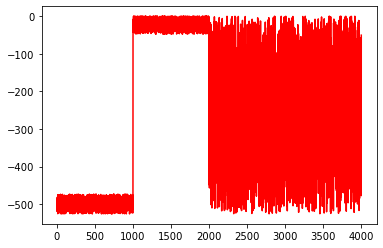

In [20]:
plt.plot(scores.index,
         scores,
          color='red', label="anomaly")

In [31]:
normal_ = predict_score(clf,train_dataset[:4000],preprocessing.MinMaxScaler()) #preprocessing.StandardScaler MinMaxScaler()

TypeError: predict_score() missing 1 required positional argument: 'scaler'

In [26]:
normal_ = pd.DataFrame(normal_,columns=['value'])

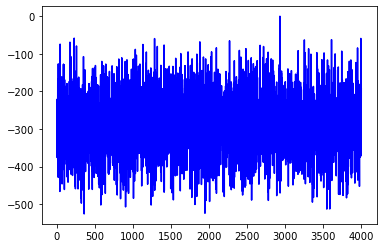

In [27]:
plt.plot(normal_.index,
         normal_,
          color='blue', label="normal_")

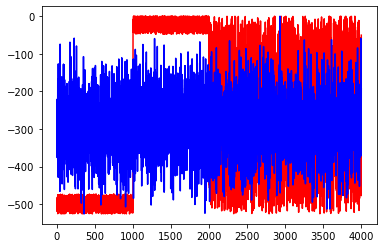

In [28]:
plt.plot(scores.index,
         scores,
          color='red', label="anomaly")

plt.plot(normal_.index,
         normal_,
          color='blue', label="normal_")

In [29]:
save_model(clf,'LOF_Model_20220406_motor_Standard_v2.pkl')

In [30]:
save_model(scaler,'LOF_Scaler_20220406_motor_Standard_v2.pkl')

In [127]:
clf = load_model('LOF_Model_20220404_pump_Standard_v1.pkl')